# Importation librairies

In [ ]:
#Install the package "scikit-multilear"
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.7MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import calendar
import warnings
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Data importation

In [ ]:
df_train =  pd.read_csv("/content/drive/My Drive/Datasets/Train.csv")
df_test =  pd.read_csv("/content/drive/My Drive/Datasets/Test.csv")

# Data exploration

In [ ]:
#See the shape of data train and test
print(df_train.shape)
print(df_test.shape)

(29132, 29)
(10000, 29)


In [ ]:
#See the sub data train
df_train.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
#See the information on metadata
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

In [ ]:
#The ID customers duplicates
print(len(df_train['ID'].unique())) #There is not duplicates

29132


In [ ]:
#See the missing data
df_train.isnull().sum()

ID                          0
join_date                   2
sex                         0
marital_status              0
birth_year                  0
branch_code                 0
occupation_code             0
occupation_category_code    0
P5DA                        0
RIBP                        0
8NN1                        0
7POT                        0
66FJ                        0
GYSR                        0
SOP4                        0
RVSZ                        0
PYUQ                        0
LJR9                        0
N2MW                        0
AHXO                        0
BSTQ                        0
FM3X                        0
K6QO                        0
QBOL                        0
JWFN                        0
JZ9D                        0
J9JW                        0
GHYX                        0
ECY3                        0
dtype: int64

In [ ]:
#Remove missing data
df_train_cleaned = df_train.dropna()

In [ ]:
#conversion join_date in format date time
df_train_cleaned['join_date'] = pd.to_datetime(df_train_cleaned['join_date'], format = '%d/%m/%Y')

#Month of join date
df_train_cleaned["join_date_month"] = df_train_cleaned['join_date'].dt.month

# Yaer of join date
df_train_cleaned["join_date_year"] = df_train_cleaned['join_date'].dt.year

# Age of customer when joined the zinmat
df_train_cleaned["Age"] = df_train_cleaned["join_date_year"] - df_train_cleaned["birth_year"]

In [ ]:
df_train_cleaned.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,LJR9,N2MW,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,join_date_month,join_date_year,Age
0,4WKQSBB,2019-02-01,F,M,1987,1X1H,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2019,32
1,CP5S02H,2019-06-01,F,M,1981,UAOD,2A7I,T4MS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6,2019,38
2,2YKDILJ,2013-06-01,M,U,1991,748L,QZYX,90QI,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,2013,22
3,2S9E81J,2019-08-01,M,M,1990,1X1H,BP09,56SI,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,8,2019,29
4,BHDYVFT,2019-08-01,M,M,1990,748L,NO3L,T4MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8,2019,29


# Univariate analysis

## Quantitatives variables

In [ ]:
##Statistiques descriptives
df_train_cleaned[['Age', 'join_date_month', 'join_date_year']].describe()

,Age,join_date_month,join_date_year
count,29130.000000,29130.000000,29130.000000
mean,38.201716,6.356574,2017.719636
std,9.251233,3.335679,1.914486
min,8.000000,1.000000,2010.000000
25%,31.000000,4.000000,2017.000000
50%,38.000000,6.000000,2018.000000
75%,45.000000,9.000000,2019.000000
max,80.000000,12.000000,2020.000000


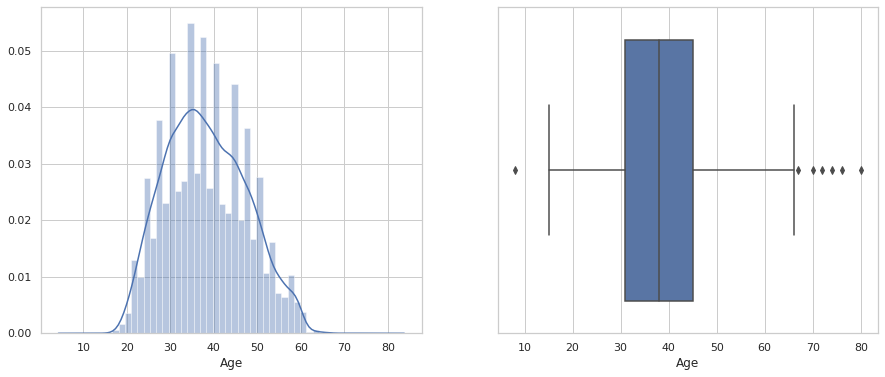

In [ ]:
##Histogram et boxplot Age
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.distplot(df_train_cleaned.Age)

plt.subplot(122)
sns.boxplot(df_train_cleaned.Age)

plt.show()

## Qualitative variables

In [ ]:
##Statistics on sex
print("========Frequency (n)=========")
tab1 = pd.DataFrame(df_train_cleaned['sex'].value_counts())
print(tab1)

print("")

print("========Proportion (%)=========")
tab2 = pd.DataFrame(np.round(100*df_train_cleaned['sex'].value_counts(normalize = True), 0))
print(tab2)

========Frequency (n)=========
     sex
M  20327
F   8803

========Proportion (%)=========
    sex
M  70.0
F  30.0


Text(0.5, 0, 'Sex')

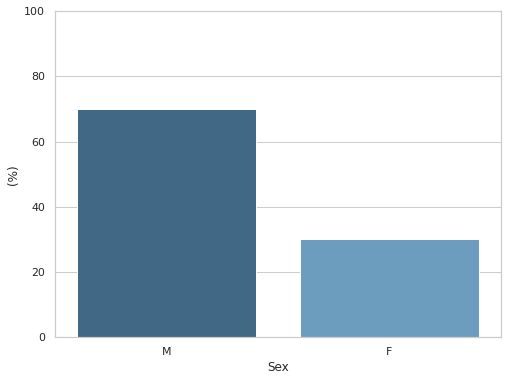

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x = tab2.index, y = tab2.sex, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Sex')

In [ ]:
##Statistics on marital_status
print("========Frequency (n)=========")
tab1 = pd.DataFrame(df_train_cleaned['marital_status'].value_counts())
print(tab1)

print("")

print("========Proportion (%)=========")
tab2 = pd.DataFrame(np.round(100*df_train_cleaned['marital_status'].value_counts(normalize = True), 0))
print(tab2)

========Frequency (n)=========
   marital_status
M           22912
S            3267
U            2473
W             301
D             135
R              34
P               7
f               1

========Proportion (%)=========
   marital_status
M            79.0
S            11.0
U             8.0
W             1.0
D             0.0
R             0.0
P             0.0
f             0.0


Text(0.5, 0, 'Marital status')

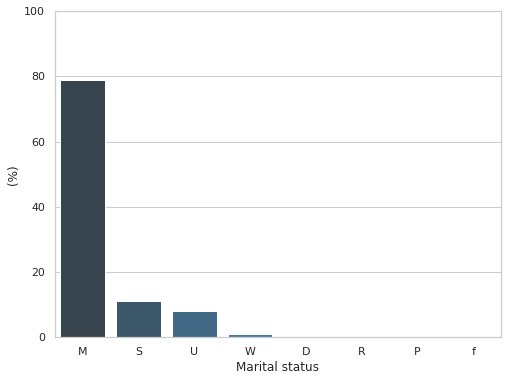

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x = tab2.index, y = tab2.marital_status, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Marital status')

In [ ]:
##Statistics on branch_code
print("========Frequency (n)=========")
tab1 = pd.DataFrame(df_train_cleaned['branch_code'].value_counts())
print(tab1)

print("")

print("========Proportion (%)=========")
tab2 = pd.DataFrame(np.round(100*df_train_cleaned['branch_code'].value_counts(normalize = True), 0))
print(tab2)

========Frequency (n)=========
      branch_code
748L         8135
94KC         3658
UAOD         3507
E5SW         3185
30H5         3151
XX25         2805
1X1H         1303
O67J         1124
ZFER          747
49BM          621
9F9T          429
BOAS          347
X23B           99
O4JC           10
EU3L            9

========Proportion (%)=========
      branch_code
748L         28.0
94KC         13.0
UAOD         12.0
E5SW         11.0
30H5         11.0
XX25         10.0
1X1H          4.0
O67J          4.0
ZFER          3.0
49BM          2.0
9F9T          1.0
BOAS          1.0
X23B          0.0
O4JC          0.0
EU3L          0.0


Text(0.5, 0, 'Branch code')

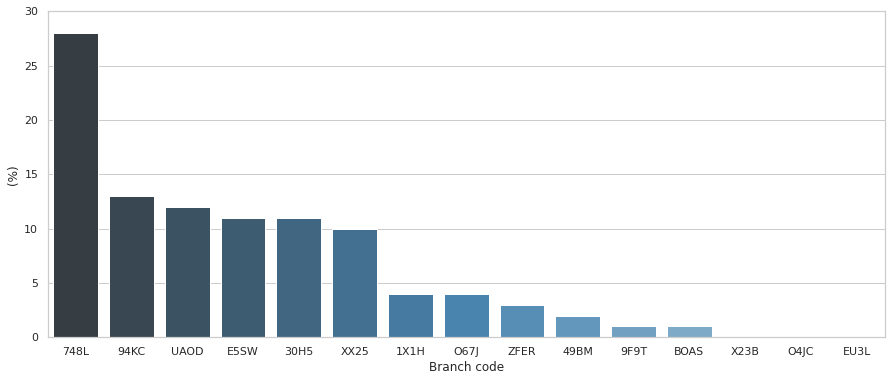

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = tab2.index, y = tab2.branch_code, palette="Blues_d")
ax.set_ylim(0, 30)
ax.set_ylabel('(%)')
ax.set_xlabel('Branch code')

In [ ]:
##Statistics on occupation_category_code
print("========Frequency (n)=========")
tab1 = pd.DataFrame(df_train_cleaned['occupation_category_code'].value_counts())
print(tab1)

print("")

print("========Proportion (%)=========")
tab2 = pd.DataFrame(np.round(100*df_train_cleaned['occupation_category_code'].value_counts(normalize = True), 0))
print(tab2)

========Frequency (n)=========
      occupation_category_code
T4MS                     18618
90QI                      5552
56SI                      3655
L44T                       627
JD7X                       576
AHH5                       102

========Proportion (%)=========
      occupation_category_code
T4MS                      64.0
90QI                      19.0
56SI                      13.0
L44T                       2.0
JD7X                       2.0
AHH5                       0.0


Text(0.5, 0, 'Catégories socio-professionelles')

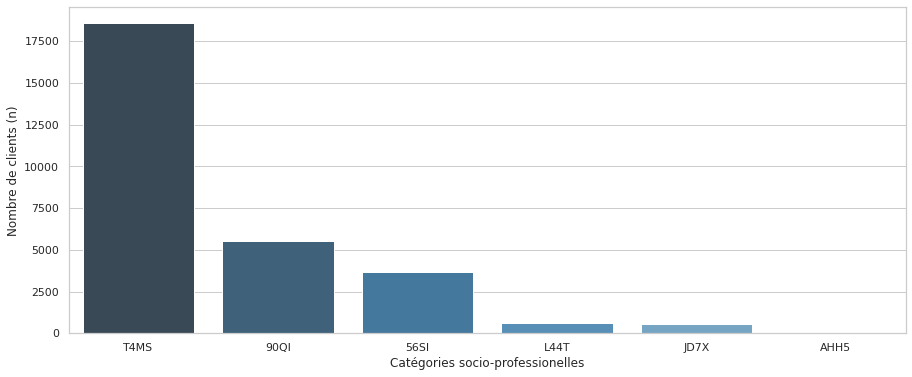

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = tab1.index, y = tab1.occupation_category_code, palette="Blues_d")
#ax.set_ylim(0, 70)
ax.set_ylabel('Nombre de clients (n)')
ax.set_xlabel('Catégories socio-professionelles')

Text(0.5, 0, 'Occupation category code')

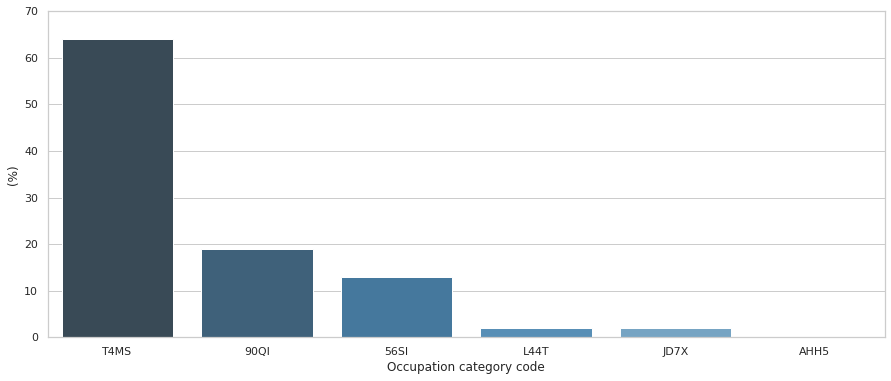

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = tab2.index, y = tab2.occupation_category_code, palette="Blues_d")
ax.set_ylim(0, 70)
ax.set_ylabel('(%)')
ax.set_xlabel('Occupation category code')

In [ ]:
##Statistics on join_date_month
print("========Frequency (n)=========")
tab1 = pd.DataFrame(df_train_cleaned['join_date_month'].value_counts())
print(tab1)

print("")

print("========Proportion (%)=========")
tab2 = pd.DataFrame(np.round(100*df_train_cleaned['join_date_month'].value_counts(normalize = True), 0))
print(tab2)

========Frequency (n)=========
    join_date_month
5              3838
4              3532
6              2533
12             2491
1              2225
8              2177
10             2096
7              2083
11             2077
9              2073
3              2063
2              1942

========Proportion (%)=========
    join_date_month
5              13.0
4              12.0
6               9.0
12              9.0
1               8.0
8               7.0
10              7.0
7               7.0
11              7.0
9               7.0
3               7.0
2               7.0


In [ ]:
#Frequences des courses par jour et heure
df_tab1 = pd.DataFrame(round(100*pd.crosstab(df_train_cleaned["join_date_year"], df_train_cleaned["join_date_month"]), 0))
df_tab1 = pd.DataFrame(df_tab1.stack())

#Recuperer les noms des colonnes sur les index 
df_tab11 = pd.DataFrame(df_tab1.to_records(), columns=df_tab1.index.names + list(df_tab1.columns)) 
df_tab11['N'] = list(df_tab1[0]) 
df_tab11 = df_tab11.drop(0, axis = 1)
df_tab11

,join_date_year,join_date_month,N
0,2010,1,0
1,2010,2,0
2,2010,3,0
3,2010,4,0
4,2010,5,800
...,...,...,...
127,2020,8,300
128,2020,9,0
129,2020,10,0
130,2020,11,0


<Figure size 7200x5760 with 0 Axes>

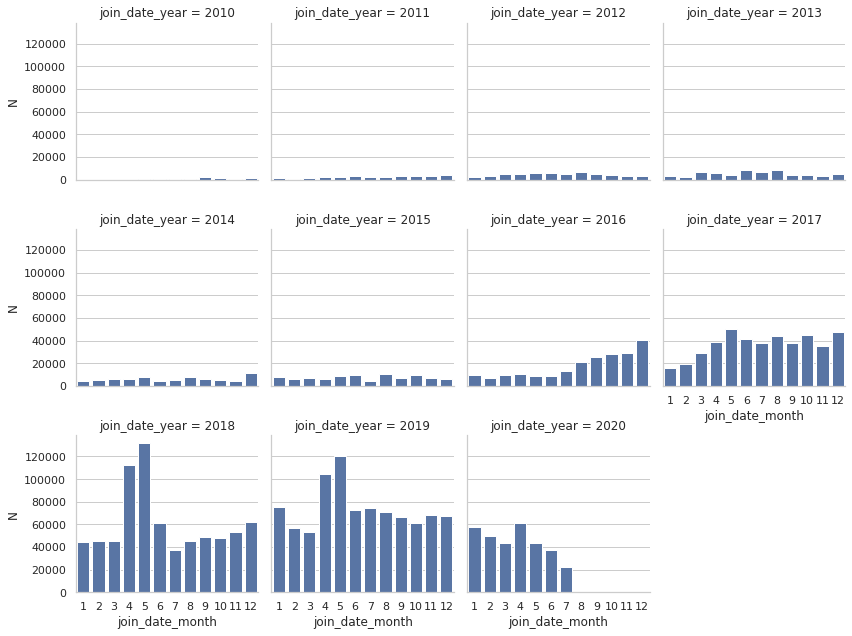

In [ ]:
plt.figure(figsize=(100, 80))
g = sns.FacetGrid(data = df_tab11, col="join_date_year", col_wrap= 4, margin_titles=True)
g.map(sns.barplot, "join_date_month", "N")

In [ ]:
# Describe the target (product code)
product_code = list(df_train_cleaned.columns.values)
product_code = product_code[8:29]
print(product_code)

['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']


In [ ]:
# Calculating number of products in each product code

counts = []
for prod in product_code:
    counts.append((prod, df_train_cleaned[prod].sum()))

df_product = pd.DataFrame(counts, columns=['Product_code', 'number of products'])
df_product = df_product.sort_values(by = ['number of products'], ascending= False)
df_product 

,Product_code,number of products
7,RVSZ,25327
14,K6QO,21628
15,QBOL,6832
8,PYUQ,2173
1,RIBP,1779
17,JZ9D,1425
18,J9JW,1418
20,ECY3,1100
19,GHYX,902
10,N2MW,838


Text(0.5, 0, 'Code produit assurance ')

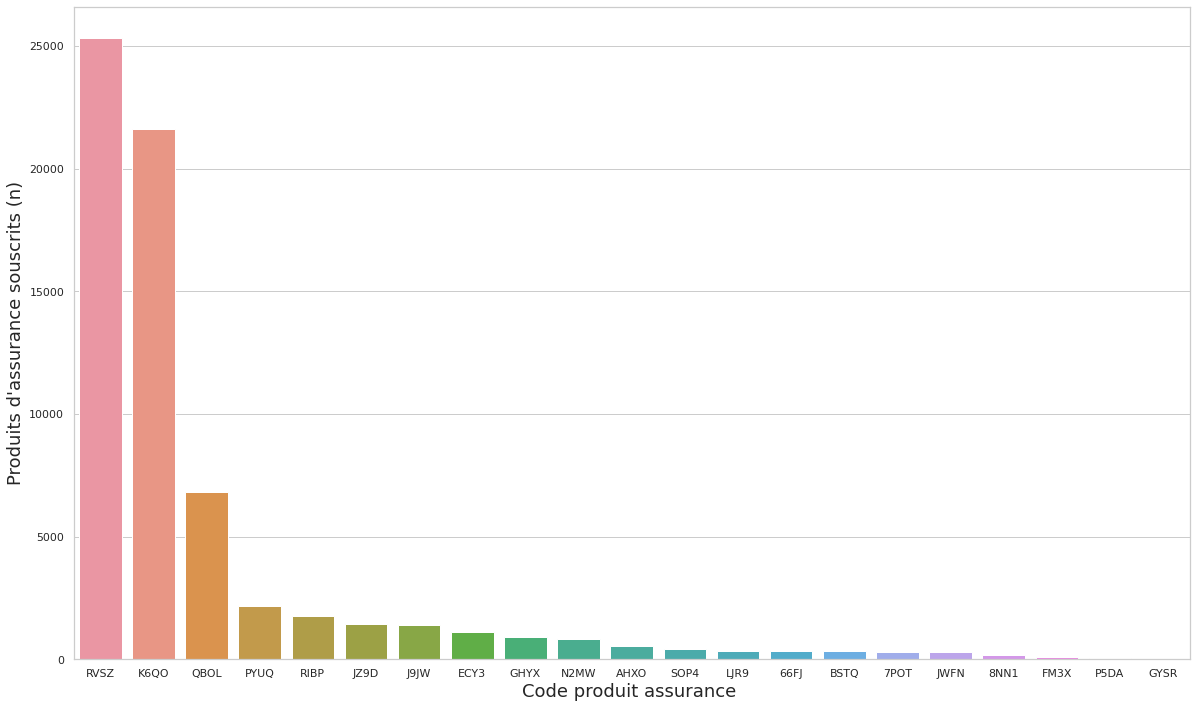

In [ ]:
plt.figure(figsize=(20,12))
 
ax= sns.barplot(x = 'Product_code',  y = 'number of products', data = df_product) 

plt.ylabel("Produits d'assurance souscrits (n)", fontsize=18)
plt.xlabel('Code produit assurance ', fontsize=18)

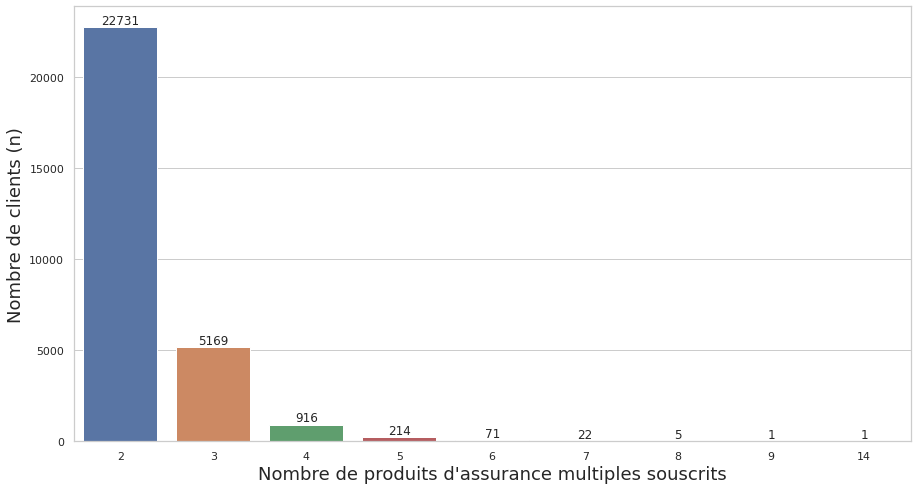

In [ ]:
##Calculating number of customers having multiple labels

rowSums = df_train_cleaned.iloc[:, 8:29].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.ylabel('Nombre de clients (n)', fontsize=18)
plt.xlabel("Nombre de produits d'assurance multiples souscrits", fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# Bivariate analysis

In [ ]:
#Cross table between target product (RVSZ, K6QO, QBOL) and features
df_train_cleaned_feature = df_train_cleaned.iloc[:, 1:8]
print(df_train_cleaned_feature.columns)

df_train_cleaned_target = df_train_cleaned.loc[:, ['RVSZ', 'K6QO', 'QBOL']]
print(df_train_cleaned_target.columns)

df_train_cleaned_sub =  pd.concat([df_train_cleaned_feature, df_train_cleaned_target], axis = 1)
df_train_cleaned_sub.head()


Index(['join_date', 'sex', 'marital_status', 'birth_year', 'branch_code',
       'occupation_code', 'occupation_category_code'],
      dtype='object')
Index(['RVSZ', 'K6QO', 'QBOL'], dtype='object')


,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,RVSZ,K6QO,QBOL
0,2019-02-01,F,M,1987,1X1H,2A7I,T4MS,1,1,0
1,2019-06-01,F,M,1981,UAOD,2A7I,T4MS,1,1,0
2,2013-06-01,M,U,1991,748L,QZYX,90QI,1,0,0
3,2019-08-01,M,M,1990,1X1H,BP09,56SI,1,1,0
4,2019-08-01,M,M,1990,748L,NO3L,T4MS,0,0,0


In [ ]:
##Reshaping dataframe 'df_train_cleaned_sub'
df_train_cleaned_sub1 = pd.melt(df_train_cleaned_sub, 
                                id_vars = df_train_cleaned_feature.columns,
                                var_name = 'Product_code',
                                value_name = 'Subscribed')
df_train_cleaned_sub1.head()

,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,Product_code,Subscribed
0,2019-02-01,F,M,1987,1X1H,2A7I,T4MS,RVSZ,1
1,2019-06-01,F,M,1981,UAOD,2A7I,T4MS,RVSZ,1
2,2013-06-01,M,U,1991,748L,QZYX,90QI,RVSZ,1
3,2019-08-01,M,M,1990,1X1H,BP09,56SI,RVSZ,1
4,2019-08-01,M,M,1990,748L,NO3L,T4MS,RVSZ,0


Text(0.5, 0, 'Code Produit')

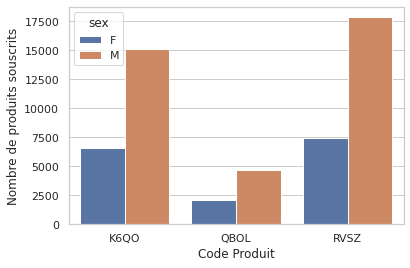

In [ ]:
## Sex by Product
df_sex_by_product = df_train_cleaned_sub1.groupby(['sex', 'Product_code'], as_index=False)['Subscribed'].sum()

ax = sns.barplot(x="Product_code", y="Subscribed", hue="sex", data = df_sex_by_product)
plt.ylabel('Nombre de produits souscrits')
plt.xlabel('Code Produit')

Text(0.5, 0, 'Code Produit')

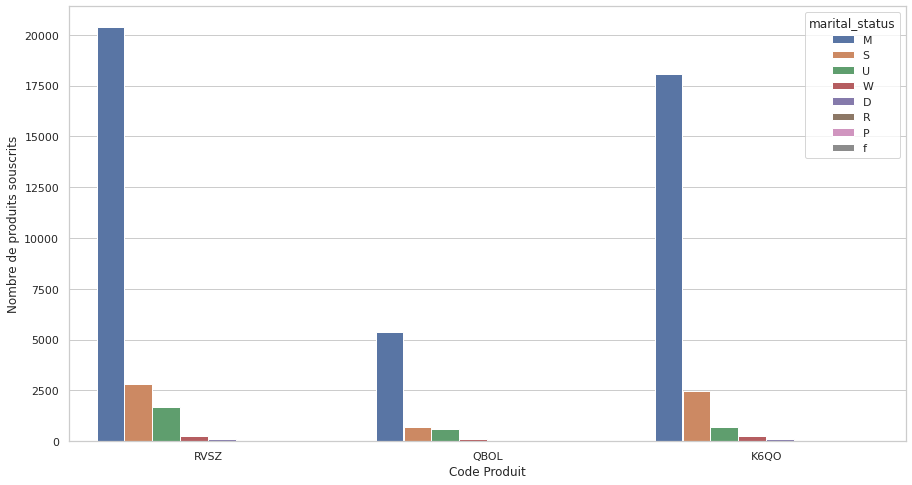

In [ ]:
## Marital status by Product
df_marital_status_by_product = df_train_cleaned_sub1.groupby(['marital_status', 'Product_code'], 
                                                             as_index=False)['Subscribed'].sum()

df_marital_status_by_product = df_marital_status_by_product.sort_values(['Product_code', 'Subscribed'], ascending= False) 
                                                        
plt.figure(figsize=(15,8))
ax = sns.barplot(x="Product_code", y="Subscribed", hue="marital_status", data = df_marital_status_by_product)
plt.ylabel('Nombre de produits souscrits')
plt.xlabel('Code Produit')

Text(0.5, 0, 'Code Produit')

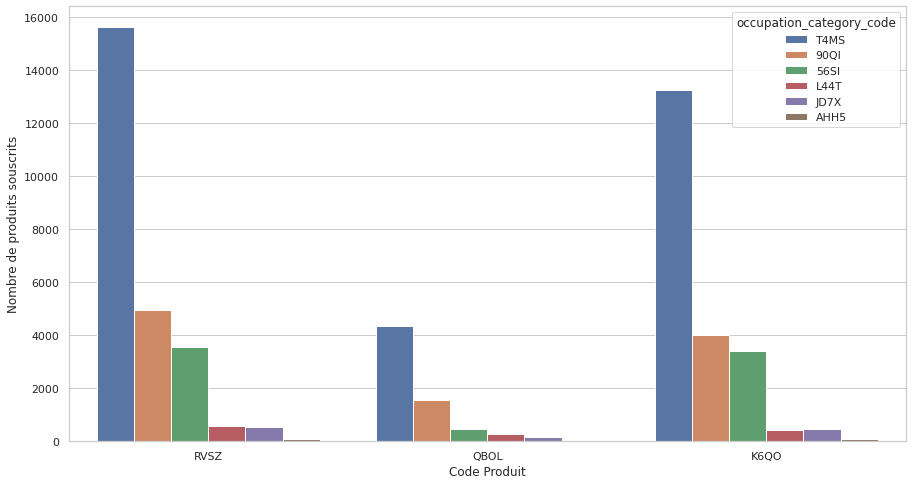

In [ ]:
## occupation_category_code by Product
df_occupation_category_code_by_product = df_train_cleaned_sub1.groupby(['occupation_category_code', 'Product_code'],
                                                                       as_index=False)['Subscribed'].sum()

df_occupation_category_code_by_product = df_occupation_category_code_by_product.sort_values(['Product_code', 
                                                                                              'Subscribed'], ascending= False) 

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Product_code", y="Subscribed", hue="occupation_category_code",
                 data = df_occupation_category_code_by_product)
plt.ylabel('Nombre de produits souscrits')
plt.xlabel('Code Produit')

Text(0.5, 0, 'Code Produit')

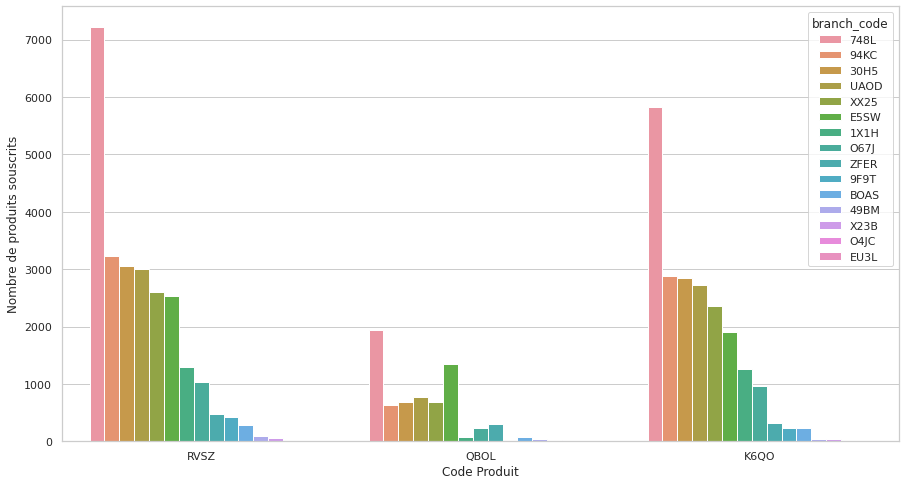

In [ ]:
## branch_code by Product
df_branch_code_by_product = df_train_cleaned_sub1.groupby(['branch_code', 'Product_code'], 
                                                          as_index=False)['Subscribed'].sum()

df_branch_code_by_product = df_branch_code_by_product.sort_values(['Product_code', 'Subscribed'], ascending= False)                                    

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Product_code", y="Subscribed", hue="branch_code",
                 data = df_branch_code_by_product)
plt.ylabel('Nombre de produits souscrits')
plt.xlabel('Code Produit')

# Machine learning

## Preprocessing

In [ ]:
##Merging two datasets
df_train_add = df_train
df_test_add = df_test

##Add the new column
df_train_add['dataset_type'] = 'Train'
df_test_add['dataset_type'] = 'Test'

df_merged = pd.concat([df_train_add, df_test_add], axis = 0)

print(df_merged.shape)

(39132, 30)


In [ ]:
#conversion join_date in format date time
df_merged['join_date'] = pd.to_datetime(df_merged['join_date'], format = '%d/%m/%Y')

# Year of join date
df_merged["join_date_year"] = df_merged['join_date'].dt.year

# Age of customer when joined the zinmat
df_merged["Age"] = df_merged["join_date_year"] - df_merged["birth_year"]

In [ ]:
# Modify the categories of marital_status
mask1 = df_merged['marital_status'] != 'M'
df_merged.loc[mask1, 'marital_status'] = 'No_M'

In [ ]:
print('Dropping outliers in Age...')
to_keep = df_merged['Age'] < df_merged['Age'].mean() + 2*df_merged['Age'].std()
df_merged = df_merged.loc[to_keep,:]
print('Done. Number of lines remaining : ', df_merged.shape[0])
print()

Dropping outliers in Age...
Done. Number of lines remaining :  37955



In [ ]:
# Separate target variable Y from features X
target_name = ['P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO',
            'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']

feature_name = ['sex', 'marital_status', 'branch_code', 'occupation_category_code']  

#Y = df_merged.loc[:, target_name + ['dataset_type']]
#X = df_merged.loc[:, feature_name + ['dataset_type']]

In [ ]:
train, test = train_test_split(df_merged.loc[df_merged['dataset_type'] == 'Train', ], 
                                             random_state=42, test_size=0.30, shuffle=True)

In [ ]:
print(train.shape)
print(test.shape)

(19786, 32)
(8481, 32)


In [ ]:
# Split dataset into train set & test set 
Y_train = train.loc[:, target_name]
X_train = train.loc[:, feature_name]
print('Y_train:', Y_train.shape)
print('X_train:', X_train.shape)

print("=========================")

Y_test = test.loc[:, target_name]
X_test = test.loc[:, feature_name]
print('Y_test:', Y_test.shape)
print('X_test:', X_test.shape)

Y_train: (19786, 21)
X_train: (19786, 4)
Y_test: (8481, 21)
X_test: (8481, 4)


In [ ]:
# Create pipeline for numeric features
#numeric_features = [1] # Positions of numeric columns in X_train/X_test
#numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#   ('scaler', StandardScaler())
#])


In [ ]:
# Create pipeline for categorical features
categorical_features = [0, 1, 2, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
           ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [ ]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

In [ ]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) 

Performing preprocessings on test set...


In [ ]:
X_test.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train.toarray()

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

## Multiple Binary Classifications - Binary Relevance

In [ ]:
%%time

# initialize binary relevance multi-label classifier
# with a logistic regression classifier

# Using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
classifier = BinaryRelevance(
    classifier = LogisticRegression(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= "weighted"))
print("Recall = ", recall_score(Y_test, predictions, average= "weighted"))
print("Hamming_loss = ", hamming_loss(Y_test, predictions))
print("F1 score = ", f1_score(Y_test, predictions, average = "weighted"))
print("\n")


Train score : 0.561609218639442
Test score =  0.562905317769131
Precision = 0.6808533608608116
Recall =  0.7223657024793388
Hamming_loss =  0.04654100763050179
F1 score =  0.6716136010206477


CPU times: user 3.04 s, sys: 1.89 ms, total: 3.04 s
Wall time: 3.07 s


In [ ]:
%%time

# initialize binary relevance multi-label classifier
# with a random forest classifier

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier

classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= "weighted"))
print("Recall = ", recall_score(Y_test, predictions, average= "weighted"))
print("Hamming_loss = ", hamming_loss(Y_test, predictions))
print("F1 score = ", f1_score(Y_test, predictions, average = "weighted"))
print("\n")

Train score : 0.5739411705246134
Test score =  0.569390402075227
Precision = 0.7398630456525621
Recall =  0.7213842975206611
Hamming_loss =  0.045305753476959705
F1 score =  0.6846833734614804


CPU times: user 38.5 s, sys: 445 ms, total: 38.9 s
Wall time: 39 s


In [ ]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
n_estimators =[3, 10, 30, 40]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the parameters grid

parameters = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': n_estimators,
        'classifier__max_features': max_features,
        'classifier__max_depth': max_depth,
        'classifier__min_samples_leaf': min_samples_leaf,
        'classifier__bootstrap': bootstrap,
    },
]

clf = GridSearchCV(BinaryRelevance(), parameters, scoring='accuracy',
                   cv = 3, verbose=2, n_jobs = -1)
clf.fit(X_train, Y_train)

print (clf.best_params_, clf.best_score_)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 39.4min finished


{'classifier': RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 30} 0.5792989004141397


In [ ]:
%%time

# initialize binary relevance multi-label classifier
# with a XgBoost classifier
from sklearn.ensemble import GradientBoostingClassifier

classifier = BinaryRelevance(
    classifier = GradientBoostingClassifier(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= "weighted"))
print("Recall = ", recall_score(Y_test, predictions, average= "weighted"))
print("Hamming_loss = ", hamming_loss(Y_test, predictions))
print("F1 score = ", f1_score(Y_test, predictions, average = "weighted"))
print("\n")

Train score : 0.5736884665925401
Test score =  0.572338167668907
Precision = 0.7214032336188018
Recall =  0.721849173553719
Hamming_loss =  0.045311368268566715
F1 score =  0.6812902363329079


CPU times: user 14.6 s, sys: 19.7 ms, total: 14.6 s
Wall time: 14.6 s


## Classifier Chains

In [ ]:
%%time

# Using classifier chains
from skmultilearn.problem_transform import ClassifierChain


classifier = ClassifierChain(
    classifier = LogisticRegression(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= "weighted"))
print("Recall = ", recall_score(Y_test, predictions, average= "weighted"))
print("Hamming_loss = ", hamming_loss(Y_test, predictions))
print("F1 score = ", f1_score(Y_test, predictions, average = "weighted"))
print("\n")

Train score : 0.5856666329728091
Test score =  0.5836575875486382
Precision = 0.6299224632597168
Recall =  0.7251033057851239
Hamming_loss =  0.046305186383007395
F1 score =  0.6690063024308491


CPU times: user 3.13 s, sys: 7.72 ms, total: 3.14 s
Wall time: 3.14 s


In [ ]:
%%time

# Using classifier chain
from skmultilearn.problem_transform import ClassifierChain
from sklearn.ensemble import RandomForestClassifier

classifier = ClassifierChain(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= "weighted"))
print("Recall = ", recall_score(Y_test, predictions, average= "weighted"))
print("Hamming_loss = ", hamming_loss(Y_test, predictions))
print("F1 score = ", f1_score(Y_test, predictions, average = "weighted"))
print("\n")

Train score : 0.5911755786920044
Test score =  0.5840113194198797
Precision = 0.724667129842086
Recall =  0.7269628099173554
Hamming_loss =  0.04614235742640412
F1 score =  0.6785449092214304


CPU times: user 51.1 s, sys: 96.2 ms, total: 51.2 s
Wall time: 51.2 s


In [ ]:
%%time

# Using classifier chain
from xgboost import XGBClassifier


classifier = ClassifierChain(
    classifier = XGBClassifier(),
    require_dense = [False, True]
)

# train
classifier.fit(X_train, Y_train)

# predict
predictions = classifier.predict(X_test)

#Evaluation
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= 'samples'))
print("Recall = ", recall_score(Y_test, predictions, average= 'samples'))
print("Hamming_loss = ", hamming_loss(Y_test, predictions, ))
print("F1 score = ", f1_score(Y_test, predictions, average = 'samples'))
print("\n")

Train score : 0.5868796118467603
Test score =  0.5844829619148685
Precision = 0.8281059623472075
Recall =  0.7574542909173259
Hamming_loss =  0.04623219409211627
F1 score =  0.7839449883135771


CPU times: user 12.7 s, sys: 75.4 ms, total: 12.8 s
Wall time: 12.8 s


## Clustering with Classifier Chain

In [ ]:
from skmultilearn.cluster import MatrixLabelSpaceClusterer
from sklearn.cluster import KMeans
from skmultilearn.ensemble import MajorityVotingClassifier, LabelSpacePartitioningClassifier

In [ ]:
matrix_clusterer = MatrixLabelSpaceClusterer(clusterer=KMeans(n_clusters=3))

In [ ]:
matrix_clusterer.fit_predict(X_train, Y_train)

array([list([0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20]),
       list([7, 14]), list([15])], dtype=object)

In [ ]:
classifier = LabelSpacePartitioningClassifier(
    classifier = ClassifierChain(classifier=RandomForestClassifier()),
    clusterer = matrix_clusterer
)

In [ ]:
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)

In [ ]:
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score = ", accuracy_score(Y_test, predictions))
print("Precision =", precision_score(Y_test, predictions, average= 'samples'))
print("Recall = ", recall_score(Y_test, predictions, average= 'samples'))
print("Hamming_loss = ", hamming_loss(Y_test, predictions, ))
print("F1 score = ", f1_score(Y_test, predictions, average = 'samples'))
print("\n")

Train score : 0.5820276963509552
Test score =  0.5846008725386157
Precision = 0.8282042212003301
Recall =  0.7574542909173259
Hamming_loss =  0.04621534971729524
F1 score =  0.7840039436254507


